In [632]:
# Read necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
%matplotlib inline

In [633]:
# Read data
df = pd.read_csv('data/listings.csv')
print(df.shape)

(3585, 95)


In [634]:
# EXPLORATORY ANALYSIS

In [635]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [636]:
# What are the features contained in data
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [637]:
# What are the types different features
df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [638]:
# Drop the rows with missing response values
df = df.dropna(subset = ['price'], axis = 0)

In [639]:
# Drop columns with all NaN values
df = df.dropna(how = 'all', axis = 1)

In [640]:
# Change the type for price
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)

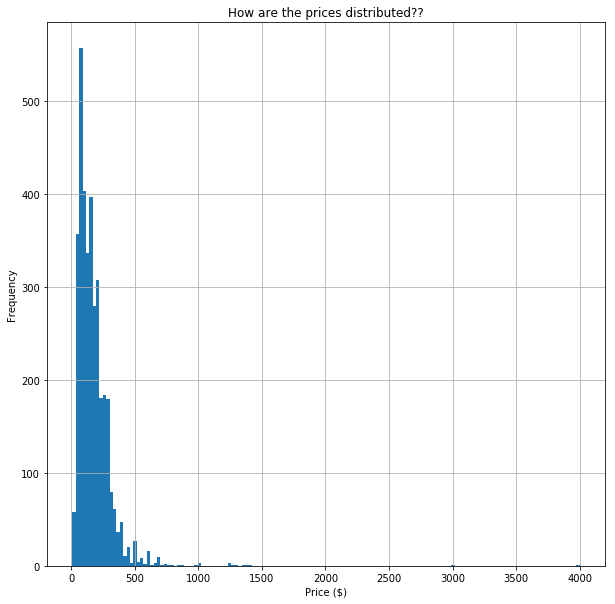

In [641]:
# How are the prices distributed?
plt.figure(figsize=(10,10))
df.price.hist(bins = 150);

plt.title("How are the prices distributed??");
plt.ylabel('Frequency');
plt.xlabel('Price ($)');

In [642]:
# What is the 99 percentile of price? - It will be used in the analyses/visualisations below
import numpy as np
np.percentile(df.price, 99)

603.0

In [643]:
# Extract numerical variables
num_df = df.select_dtypes(include = ['int', 'float'])
num_df.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [644]:
# Extract categorical variables
cat_df = df.select_dtypes(include = ['object'])
cat_df.columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'extra_people', 'calendar_updated',
       'calendar_last_scraped', 'first_review', 'la

In [645]:
# WHICH FEATURES AFFECT THE PRICE?

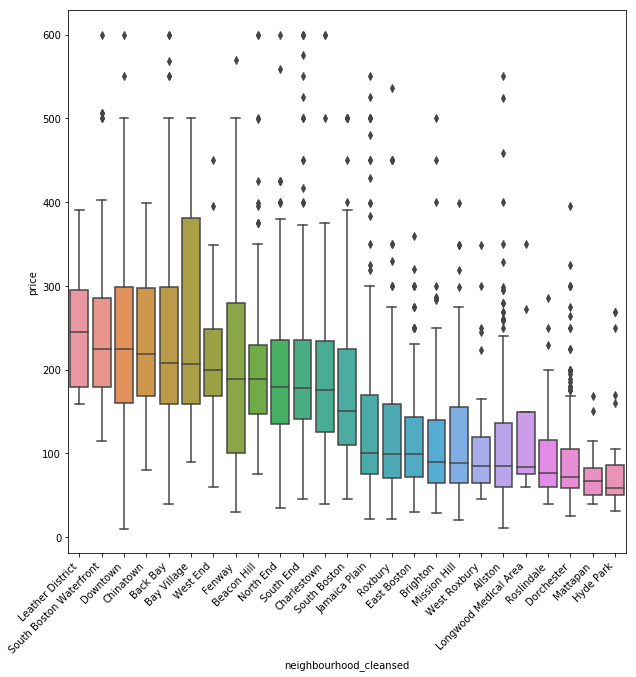

In [646]:
# What is the range of prices for each neighbourhood?
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=df.query('price <= 600'), 
            order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

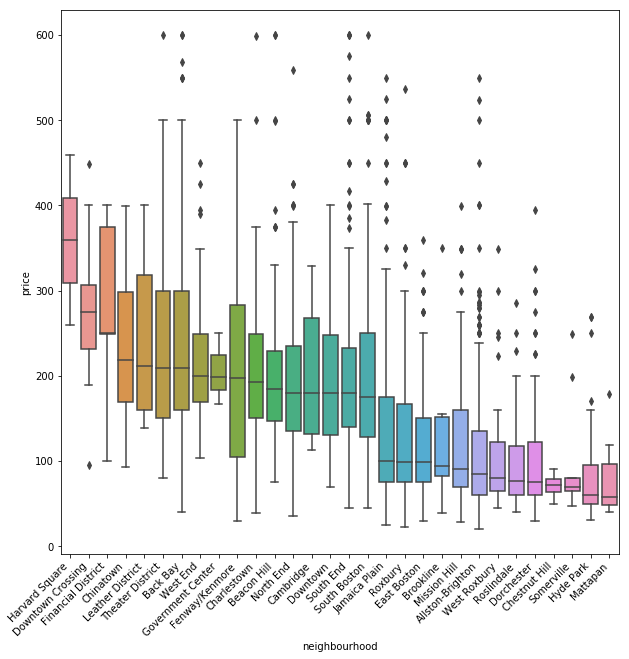

In [647]:
# What is the range of prices for each neighbourhood?
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('neighbourhood')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood', data=df.query('price <= 600'), 
            order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

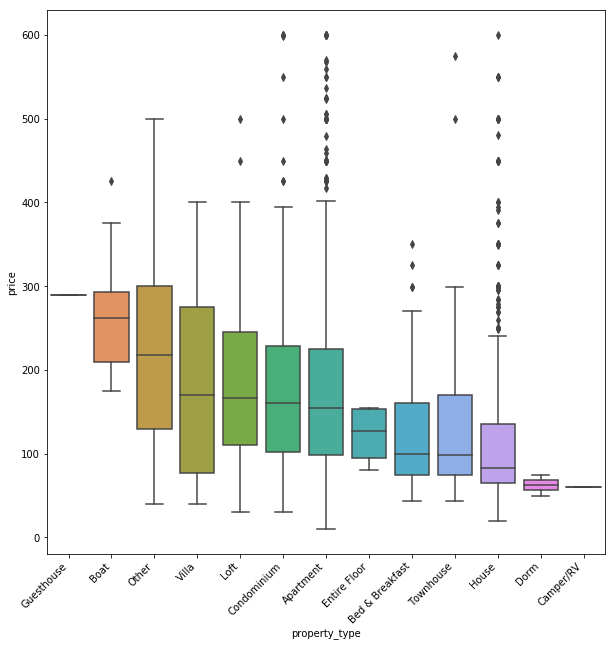

In [648]:
# What is the range of prices for each property type?
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=df.query('price <= 600'), 
            order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

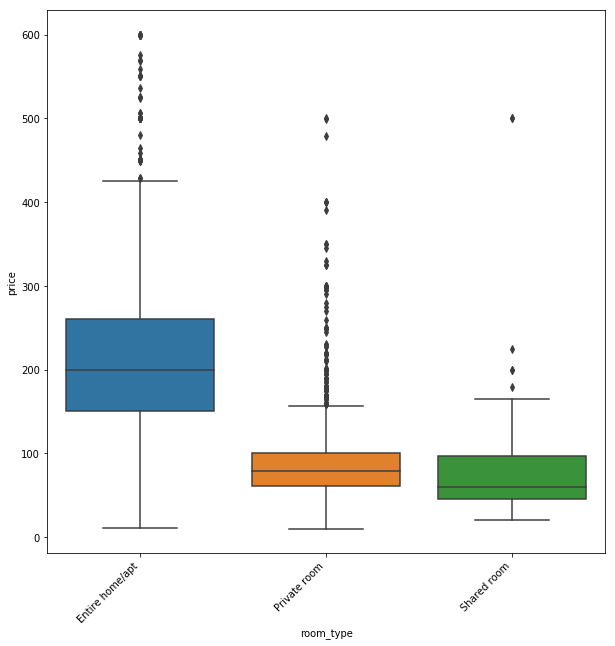

In [649]:
# What is the range of prices for each room type?
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=df.query('price <= 600'), 
            order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

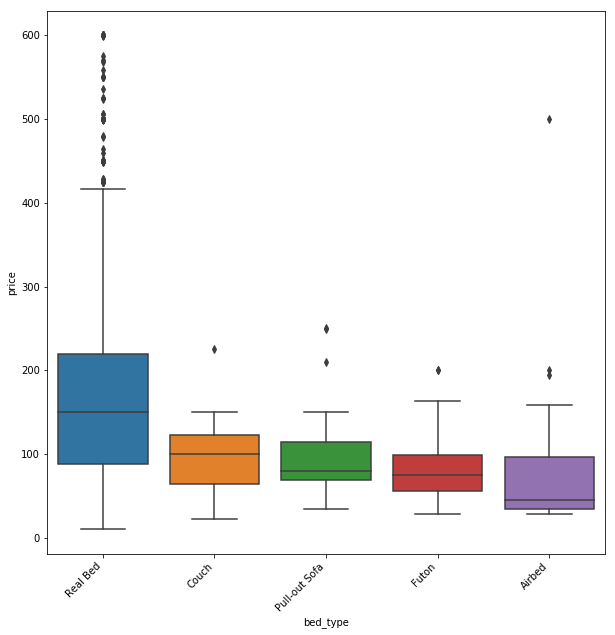

In [650]:
# What is the range of prices for each bed type?
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bed_type', data=df.query('price <= 600'), 
            order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

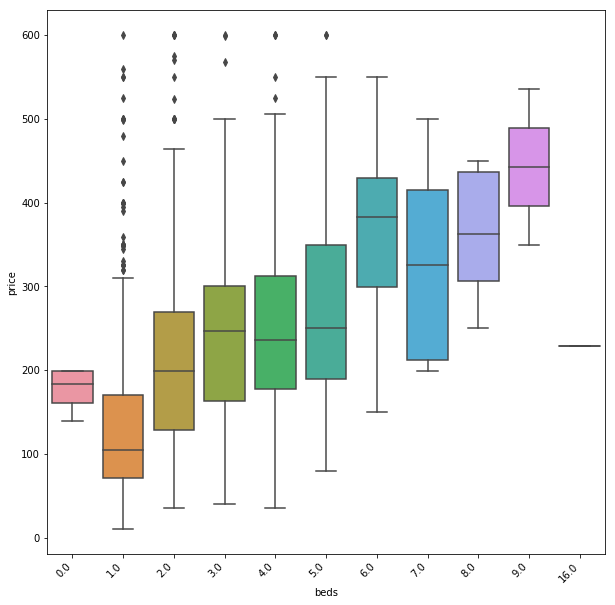

In [651]:
# What is the range of prices for number of beds?
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('beds')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='beds', data=df.query('price <= 600'))
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

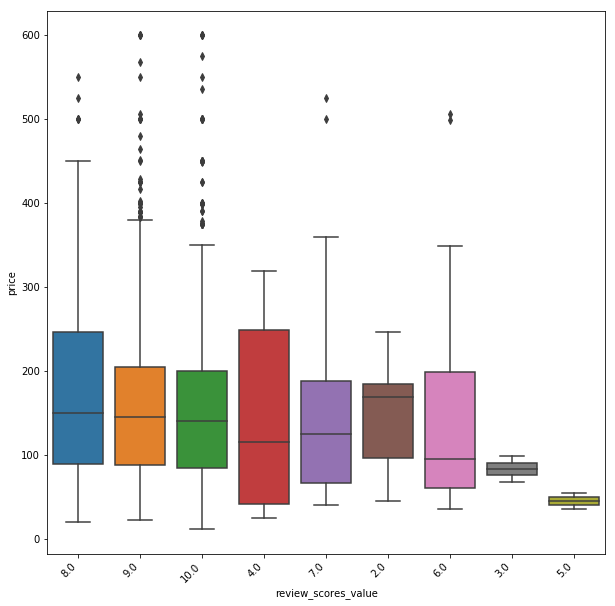

In [652]:
# What is the range of prices for review score value?
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('review_scores_value')['price']\
                    .mean()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='review_scores_value', data=df.query('price <= 600'), order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

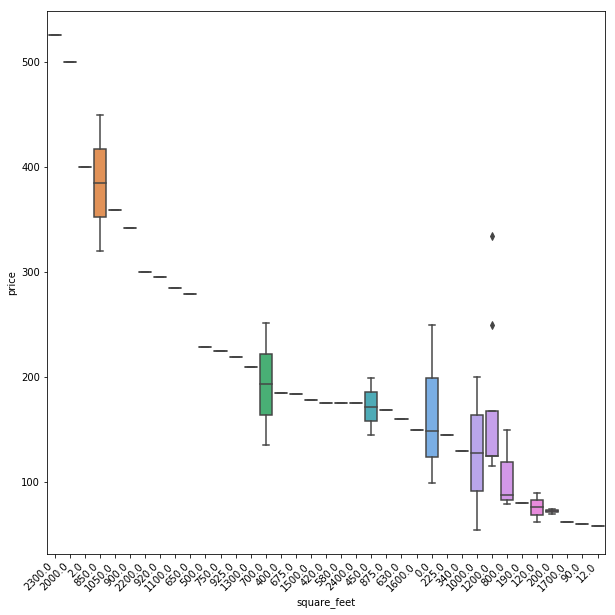

In [653]:
# What is the range of prices for different square feets?
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('square_feet')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='square_feet', data=df.query('price <= 600'), order = sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

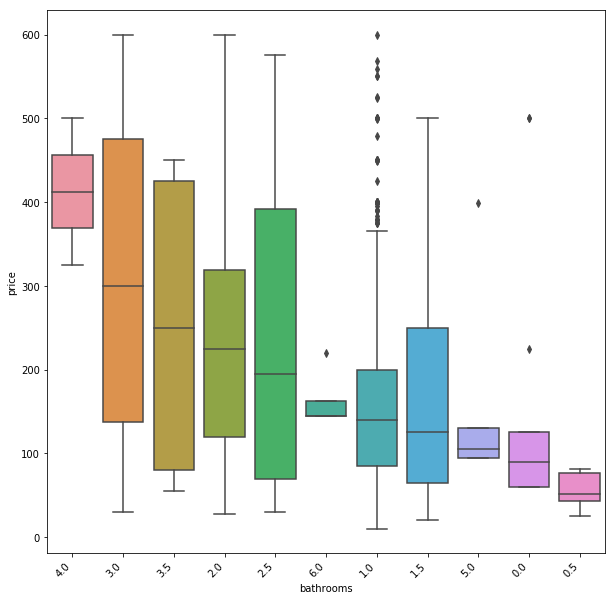

In [654]:
# What is the range of prices for different number of bathrooms?
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('bathrooms')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bathrooms', data=df.query('price <= 600'), order = sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

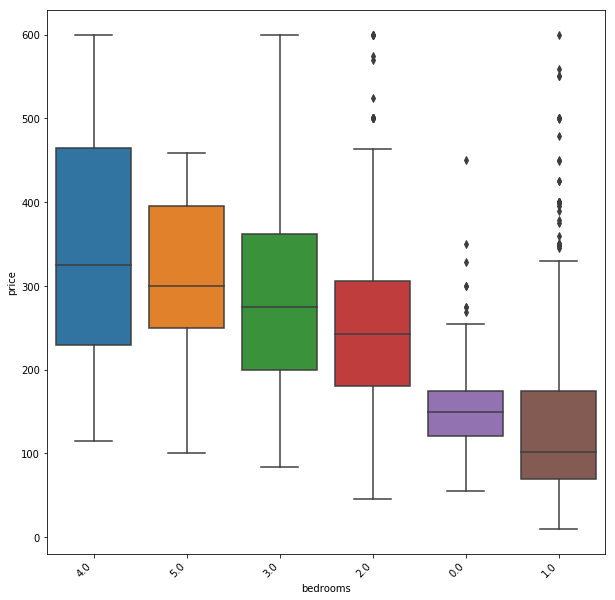

In [655]:
# What is the range of prices for different number of bedrooms?
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('bedrooms')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bedrooms', data=df.query('price <= 600'), order = sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

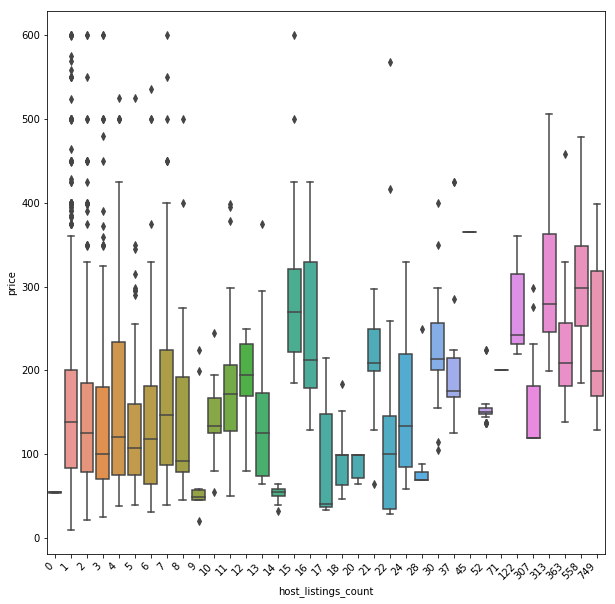

In [656]:
# What is the range of prices for different number of host_listings_count?
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('host_listings_count')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='host_listings_count', data=df.query('price <= 600'))
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

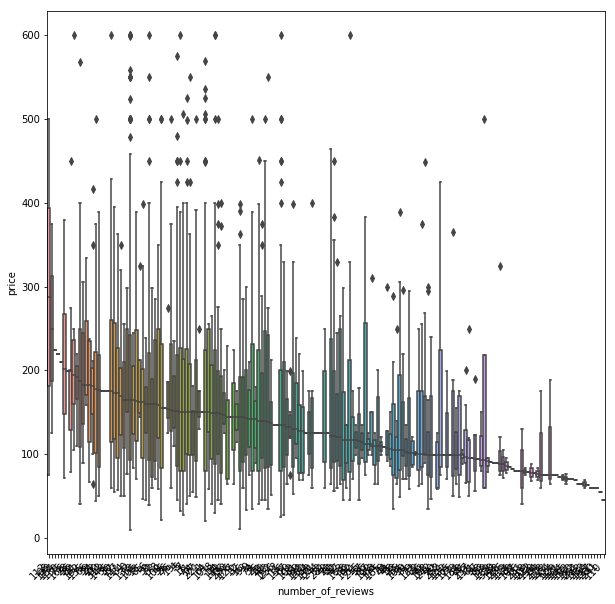

In [657]:
# What is the range of prices for different number of reviews?
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('number_of_reviews')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='number_of_reviews', data=df.query('price <= 600'), order = sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

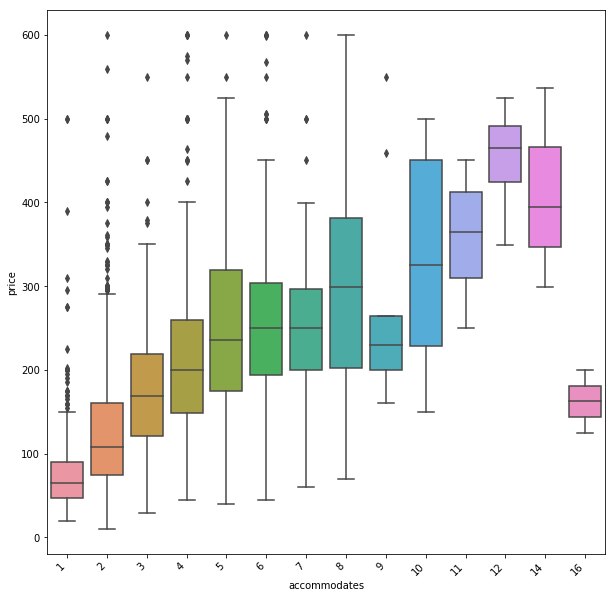

In [658]:
# What is the range of prices for different number of accommodates?
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('accommodates')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='accommodates', data=df.query('price <= 600'))
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

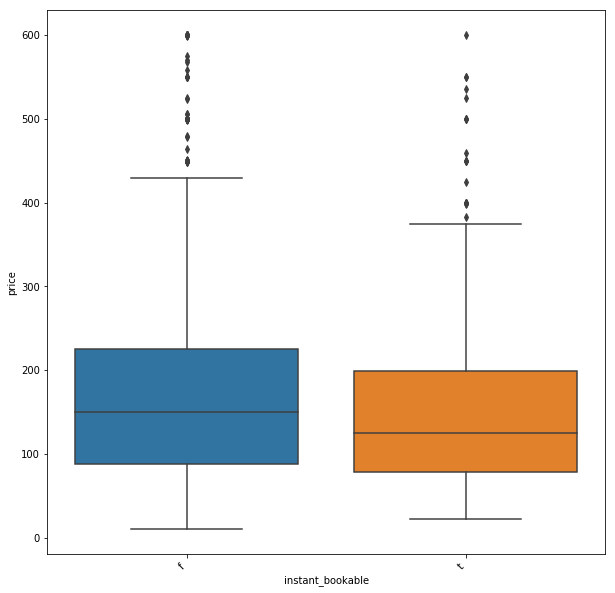

In [659]:
# What is the range of prices for different instant_bookable policies?
plt.figure(figsize=(10,10))
sort_order = df.query('price <= 600')\
                    .groupby('instant_bookable')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='instant_bookable', data=df.query('price <= 600'), order = sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()



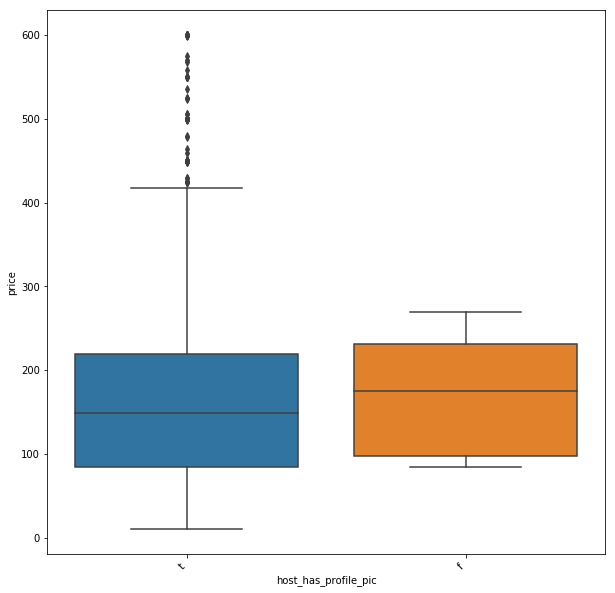

In [660]:
# What is the range of prices for different hosts?
plt.figure(figsize=(10,10))
sns.boxplot(y='price', x='host_has_profile_pic', data=df.query('price <= 600'))
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

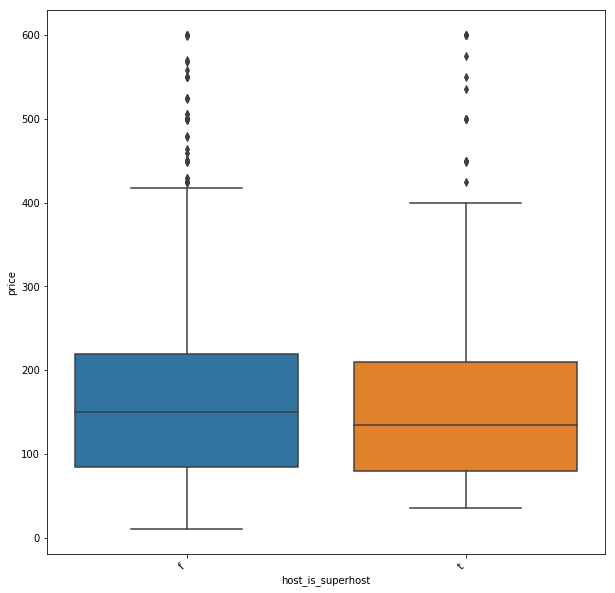

In [661]:
# What is the range of prices for different hosts?
plt.figure(figsize=(10,10))
sns.boxplot(y='price', x='host_is_superhost', data=df.query('price <= 600'))
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

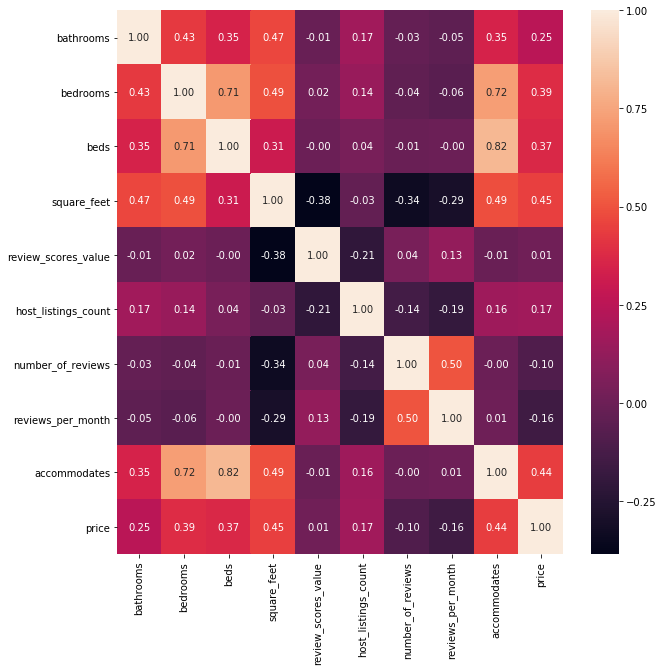

In [662]:
# How correlated are numerical features with prices?
df_selected = df[['bathrooms', 'bedrooms', 'beds','square_feet', 'review_scores_value', \
                'host_listings_count', 'number_of_reviews', 'reviews_per_month', 'accommodates', 'price']]
plt.figure(figsize=(10,10))
sns.heatmap(df_selected.corr(), annot=True, fmt='.2f');

In [663]:
# MODELING

In [664]:
# Extract numerical columns expected to relate with prices

# Based on the correlation matrix shown above, 
# 'bathrooms', 'bedrooms', 'bed', 'square_feet', 'accommodates' are correllated with 'price'.
# These features are also correlated among themselves.
# We choose only 'accommodates' as an explanatory variable in the model from this group, in order to reduce the 
# effect of conlinearity.
# This feature is chosen based on its value of correlation with price, and based on the fact that it does not contain
# NaN values

print(df.square_feet.isnull().mean())
print(df.accommodates.isnull().mean())
print(df.bedrooms.isnull().mean())
print(df.beds.isnull().mean())
num_cols = ['accommodates', 'number_of_reviews', 'host_listings_count', 'price']

0.9843793584379359
0.0
0.002789400278940028
0.002510460251046025


In [665]:
print(df.neighbourhood_cleansed.isnull().mean())
print(df.property_type.isnull().mean())
print(df.room_type.isnull().mean())
print(df.bed_type.isnull().mean())

0.0
0.0008368200836820083
0.0
0.0


In [666]:
# Extract categorical columns expected to relate with prices
cat_cols = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', \
            'require_guest_phone_verification', 'require_guest_profile_picture']
data = df[num_cols + cat_cols]
for col in cat_cols:
    data = pd.concat([data.drop(col, axis = 1), \
                pd.get_dummies(data[col], prefix = col, prefix_sep = "_", dummy_na = True)], \
                axis = 1)

data.head()

,accommodates,number_of_reviews,host_listings_count,price,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan
0,4,0,1,250.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,2,36,1,65.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,2,41,1,65.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,4,1,1,75.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,2,29,1,79.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [667]:
# Fill missing values
fill_mean = lambda col: col.fillna(col.mean)
data = data.apply(fill_mean, axis = 0)

In [668]:
# Model A: Simple linear regression
# Explanatory variables: 'accommodates'
# Target: 'price'

features = ['accommodates']
X = data[features]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_score = r2_score(y_train, y_train_pred)
print('Train score: ' + str(train_score))

y_test_pred = reg.predict(X_test)
test_score = r2_score(y_test, y_test_pred)
print('Test score: ' + str(test_score))

X_stats = sm.add_constant(X)
est = sm.OLS(y, X_stats)
stats = est.fit()
print(stats.summary())

Train score: 0.1945068694600124
Test score: 0.18623749970756176
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     849.4
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          9.25e-168
Time:                        14:26:53   Log-Likelihood:                -22628.
No. Observations:                3585   AIC:                         4.526e+04
Df Residuals:                    3583   BIC:                         4.527e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [669]:
# Model B: Multivariate linear regression
# Explanatory variables: only numerical - 'accommodates', 'number_of_reviews', 'host_listings_count'
# Target: 'price'

features = ['accommodates', 'number_of_reviews', 'host_listings_count']
X = data[features]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_score = r2_score(y_train, y_train_pred)
print('Train score: ' + str(train_score))

y_test_pred = reg.predict(X_test)
test_score = r2_score(y_test, y_test_pred)
print('Test score: ' + str(test_score))

X_stats = sm.add_constant(X)
est = sm.OLS(y, X_stats)
stats = est.fit()
print(stats.summary())

Train score: 0.21853996092598238
Test score: 0.1922817675542835
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     315.3
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          1.15e-181
Time:                        14:26:55   Log-Likelihood:                -22589.
No. Observations:                3585   AIC:                         4.519e+04
Df Residuals:                    3581   BIC:                         4.521e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [670]:
# Model C: Multivariate linear regression
# Explanatory variables: 
#    numerical - 'accommodates', 'number_of_reviews', 'host_listings_count'
#    categorical - 'room_type' and 'require_guest_phone_verification' categories
# Target: 'price'

features = ['accommodates', 'number_of_reviews', 'host_listings_count', 'room_type_Entire home/apt', \
            'room_type_Private room', 'room_type_Shared room', 'require_guest_phone_verification_t', \
           'require_guest_profile_picture_t']
X = data[features]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_score = r2_score(y_train, y_train_pred)
print('Train score: ' + str(train_score))

y_test_pred = reg.predict(X_test)
test_score = r2_score(y_test, y_test_pred)
print('Test score: ' + str(test_score))

X_stats = sm.add_constant(X)
est = sm.OLS(y, X_stats)
stats = est.fit()
print(stats.summary())

Train score: 0.28716954199739364
Test score: 0.23280885317940558
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     186.2
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          7.48e-236
Time:                        14:27:33   Log-Likelihood:                -22453.
No. Observations:                3585   AIC:                         4.492e+04
Df Residuals:                    3577   BIC:                         4.497e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [671]:
# Model D: Multivariate linear regression
# Explanatory variables: 
#    numerical - 'accommodates', 'number_of_reviews', 'host_listings_count'
#    categorical - 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type',
#                  'require_guest_phone_verification' and 'require_guest_profile_picture' categories
# Target: 'price'

data1 = data
y = data1['price']
data1 = data1.drop(['price', 'neighbourhood_cleansed_nan', 'property_type_nan', 'room_type_nan', 'bed_type_nan',\
                   'require_guest_phone_verification_nan', 'require_guest_profile_picture_nan'], axis = 1)
X = data1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_score = r2_score(y_train, y_train_pred)
print('Train score: ' + str(train_score))

y_test_pred = reg.predict(X_test)
test_score = r2_score(y_test, y_test_pred)
print('Test score: ' + str(test_score))

X_stats = sm.add_constant(X)
est = sm.OLS(y, X_stats)
stats = est.fit()
print(stats.summary())

Train score: 0.35950185626610587
Test score: 0.2755278916394275
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     36.18
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          3.08e-266
Time:                        14:27:42   Log-Likelihood:                -22293.
No. Observations:                3585   AIC:                         4.468e+04
Df Residuals:                    3536   BIC:                         4.499e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [672]:
# Model E: Multivariate linear regression
# Explanatory variables: 
#    numerical - 'accommodates', 'number_of_reviews'
#    categorical - 'property_type' and 'room_type' categories
# Target: 'price'

features = ['accommodates', 'number_of_reviews', 'room_type_Entire home/apt', 'property_type_Camper/RV', \
           'property_type_House']
y = data['price']
X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
train_score = r2_score(y_train, y_train_pred)
print('Train score: ' + str(train_score))

y_test_pred = reg.predict(X_test)
test_score = r2_score(y_test, y_test_pred)
print('Test score: ' + str(test_score))

X_stats = sm.add_constant(X)
est = sm.OLS(y, X_stats)
stats = est.fit()
print(stats.summary())

Train score: 0.27330863854160437
Test score: 0.22812213321480668
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     247.1
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          2.67e-227
Time:                        14:28:31   Log-Likelihood:                -22478.
No. Observations:                3585   AIC:                         4.497e+04
Df Residuals:                    3579   BIC:                         4.500e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
